In [4]:
# activate R magic
%load_ext rpy2.ipython

/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:14: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex
/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:34: UserWarning: pandas >= 1.0 is not supported.
  warnings.warn('pandas >= 1.0 is not supported.')


%%R
#**Remodelagem de Dados com R** 



**tidyr** - Remodelagem de Dados, **Formatação dos dados**. Com apenas uma função, somos capazes de mudar completamente o formato (shape) dos nossos dados e isso pode fazer muita diferença no processo de análise. 

- gather( )  -    tudo que é linha vira coluna
- spread( )  -    tudo que é coluna vira linha
- separate( ) -  separar coluna coluna data em dia | mês | ano
- unite( ) - unir dados em uma única coluna


---


#**tidyr - Remodelagem de Dados**

In [0]:
%%R
# Instalando os pacotes
install.packages("tidyr")
install.packages("ggplot2")
library(tidyr)
library(ggplot2)


## Dados de notas em disciplinas


In [107]:
%%R
dados <- data.frame(
    Nome = c("Geografia", "Literatura", "Biologia"),
    Regiao_A = c(97, 80, 84),
    Regiao_B = c(86, 90, 91)
)
dados

        Nome Regiao_A Regiao_B
1  Geografia       97       86
2 Literatura       80       90
3   Biologia       84       91


---

#**gather()**- {tidyr}
## Remodelar variáveis e valores de forma clara
### Extrair da Região_A e Região_B a NotaFinal e Região.


In [109]:
%%R
dados %>% 
  gather(Regiao, NotaFinal, Regiao_A:Regiao_B)
  # gerar duas novas colunas a partir de Regiao_A e Regiao_B
  # agora temos de fato 3 variáveis diferentes e suas combinações

        Nome   Regiao NotaFinal
1  Geografia Regiao_A        97
2 Literatura Regiao_A        80
3   Biologia Regiao_A        84
4  Geografia Regiao_B        86
5 Literatura Regiao_B        90
6   Biologia Regiao_B        91


---

#**Criando DataFrame II**

## Repetição de informação apenas com títulos diferentes



In [116]:
%%R 
 set.seed(10)
 df2 = data.frame(
    id = 1:4,
    acao = sample(rep(c("controle", "tratamento"), each = 2)),
    work.T1 = runif(4),
    home.T1 = runif(4),
    work.T2 = runif(4),
    home.T2 = runif(4)
 )

 df2

  id       acao    work.T1   home.T1   work.T2    home.T2
1  1 tratamento 0.08513597 0.6158293 0.1135090 0.05190332
2  2   controle 0.22543662 0.4296715 0.5959253 0.26417767
3  3   controle 0.27453052 0.6516557 0.3580500 0.39879073
4  4 tratamento 0.27230507 0.5677378 0.4288094 0.83613414


#**gather() - Reshape 1** **bold text**

In [121]:
%%R
 df2_organizado1 <- df2 %>% #df2 concatenará %>% com a função gather()
  gather (key, time, -id, -acao) #função gather criará duas novas colunas key e time

  df2_organizado1 %>% head(8)

  id       acao     key       time
1  1 tratamento work.T1 0.08513597
2  2   controle work.T1 0.22543662
3  3   controle work.T1 0.27453052
4  4 tratamento work.T1 0.27230507
5  1 tratamento home.T1 0.61582931
6  2   controle home.T1 0.42967153
7  3   controle home.T1 0.65165567
8  4 tratamento home.T1 0.56773775


## Resultado do Reshape 1:

- A função gather() pegará todas as colunas exceto (-)id e (-)acao 
- Estas colunas selecionadas serão agrupadas nas novas colunas "key" e "time"
- Tudo que representa a variável TEMPO paea paea coluna "time"
- Tudo que representa o número|código do turno passa para coluna "key"


## "T1" parece representar algo a mais



---



---



#**separate() - Reshape II** 

Separamos T1 em uma coluna nova, selecionando a coluna "key" e colocando work e home em novas colunas chamada s"localidade" e T1 em "tempo" separadas por ponto \\. através da função separate().

In [124]:
%%R
df2_organizado2 <- df2_organizado1 %>%
  separate(key, into = c("localidade", "tempo"), sep ="\\.")

df2_organizado2 %>% head(8)


  id       acao localidade tempo       time
1  1 tratamento       work    T1 0.08513597
2  2   controle       work    T1 0.22543662
3  3   controle       work    T1 0.27453052
4  4 tratamento       work    T1 0.27230507
5  1 tratamento       home    T1 0.61582931
6  2   controle       home    T1 0.42967153
7  3   controle       home    T1 0.65165567
8  4 tratamento       home    T1 0.56773775


---

#**Reshape III** 

In [125]:
%%R
 df3 <- data.frame(
     participante = c("p1", "p2", "p3", "p4", "p5", "p6"),
     info = c("g1m","g1m","g1f", "g2m", "g2m", "g2m"),
     day1score = rnorm(n = 6, mean = 80, sd =15), 
     day2score = rnorm(n = 6, mean = 88, sd = 8)
 )

 print(df3)

  participante info day1score day2score
1           p1  g1m  96.52669  80.36045
2           p2  g1m  91.33672  86.43880
3           p3  g1f  76.42650  95.40417
4           p4  g2m  94.81167  91.86383
5           p5  g2m  91.12085  83.22951
6           p6  g2m  81.34021  70.51771


#**gather()** 

In [127]:
%%R
  df3 %>%
    gather(day, score, c(day1score, day2score))
    #day e score serão as duas novas colunas criadas a partir de day1 e day2
    #day1score e day2score na nova coluna day
    #valores de day1 e day2 na nova coluna score

   participante info       day    score
1            p1  g1m day1score 96.52669
2            p2  g1m day1score 91.33672
3            p3  g1f day1score 76.42650
4            p4  g2m day1score 94.81167
5            p5  g2m day1score 91.12085
6            p6  g2m day1score 81.34021
7            p1  g1m day2score 80.36045
8            p2  g1m day2score 86.43880
9            p3  g1f day2score 95.40417
10           p4  g2m day2score 91.86383
11           p5  g2m day2score 83.22951
12           p6  g2m day2score 70.51771


#**gather() x spread()**

In [128]:
%%R
  df3 %>%
  gather(day, score, day1score, day2score) %>%
  spread(day, score)
  # quando a mudança não é a esperada, voltar para o molde origina
  # ao usar o gather, retornou para o origninal - mudançã inesperada
  # spread é o oposto da função do gather

  participante info day1score day2score
1           p1  g1m  96.52669  80.36045
2           p2  g1m  91.33672  86.43880
3           p3  g1f  76.42650  95.40417
4           p4  g2m  94.81167  91.86383
5           p5  g2m  91.12085  83.22951
6           p6  g2m  81.34021  70.51771


#**separate()**

In [131]:
%%R
  df3 %>%
  gather(day, score, c(day1score, day2score)) %>% # concatenar gather com separate
  separate(col = info, into = c("group", "gender"), sep = 2)
  #separação com base em "group" e "gender"
  #tudo que era "g" alocado em uma coluna agrupamento "group"
  #tudo que era m ou f alocado em um coluna de gênero "gender"

   participante group gender       day    score
1            p1    g1      m day1score 96.52669
2            p2    g1      m day1score 91.33672
3            p3    g1      f day1score 76.42650
4            p4    g2      m day1score 94.81167
5            p5    g2      m day1score 91.12085
6            p6    g2      m day1score 81.34021
7            p1    g1      m day2score 80.36045
8            p2    g1      m day2score 86.43880
9            p3    g1      f day2score 95.40417
10           p4    g2      m day2score 91.86383
11           p5    g2      m day2score 83.22951
12           p6    g2      m day2score 70.51771


#**unite()**

In [132]:
%%R
df3 %>%
  gather(day, score, c(day1score, day2score)) %>%
  separate(col = info, into = c("group", "gender"), sep = 2) %>%
  unite(infoAgain, group, gender) #unificar novamente com unite
  #inicialmente tinhamos "participante|info|day1|day2" e aplicamos gather
  #decidimos unificar novamente usando uma notação e criar "infoAgain"
  #analisar se os dados podem ou não, devem ou não ser separados 


   participante infoAgain       day    score
1            p1      g1_m day1score 96.52669
2            p2      g1_m day1score 91.33672
3            p3      g1_f day1score 76.42650
4            p4      g2_m day1score 94.81167
5            p5      g2_m day1score 91.12085
6            p6      g2_m day1score 81.34021
7            p1      g1_m day2score 80.36045
8            p2      g1_m day2score 86.43880
9            p3      g1_f day2score 95.40417
10           p4      g2_m day2score 91.86383
11           p5      g2_m day2score 83.22951
12           p6      g2_m day2score 70.51771


---

#**Poder da Manipulação de Dados em R**

## Podemos fazer tudo junto
#### Pegar o data frame, fazer o gather() para modificar o shape de linha e coluna, aplicar separate() para modificar e separar as colunas, chamar ggplot() para plotar os dados em em um geom_point(), facet_wrap() para separar dois gráficos numa mesma área de plotagem e por último geom_smooth() para aplicar um **modelo de regressão linear**. 

R[write to console]: `geom_smooth()` using formula 'y ~ x'



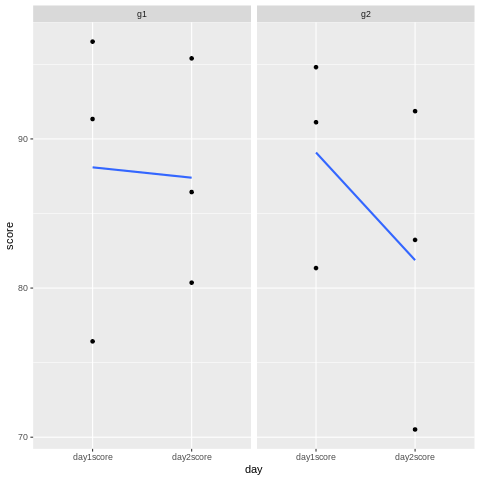

In [133]:
%%R
df3 %>%
  gather(day, score, c(day1score, day2score)) %>%
  separate(col = info, into = c("group", "gender"), sep = 2) %>%
  ggplot(aes(x = day, y = score)) + 
  geom_point() + 
  facet_wrap(~ group) +
  geom_smooth(method = "lm", aes(group = 1), se = F)
  


---

#**Pacote Reshape()**  - {stats}

In [136]:
%%R 
 head(mtcars)

                   mpg cyl disp  hp drat    wt  qsec vs am gear carb
Mazda RX4         21.0   6  160 110 3.90 2.620 16.46  0  1    4    4
Mazda RX4 Wag     21.0   6  160 110 3.90 2.875 17.02  0  1    4    4
Datsun 710        22.8   4  108  93 3.85 2.320 18.61  1  1    4    1
Hornet 4 Drive    21.4   6  258 110 3.08 3.215 19.44  1  0    3    1
Hornet Sportabout 18.7   8  360 175 3.15 3.440 17.02  0  0    3    2
Valiant           18.1   6  225 105 2.76 3.460 20.22  1  0    3    1


In [0]:
%%R
  t(mtcars) #transposta para transformar linhas em colunas, colunas em linhas

---

In [6]:
%%R
head(iris)
str(iris)
library(lattice) # criar gráficos com o pacote lattice

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


# Distribuindo os dados verticalmente (long)


In [0]:
%%R
iris_modif <- reshape(iris, #passar conjunto de dados com parâmetro
                      varying = 1:4, #a variação com quais colunas queremos fazer a transformação
                      v.names = "Medidas", #nome para nova coluna
                      timevar = "Dimensoes", #nome para a nova coluna
                      times = names(iris)[1:4], 
                      idvar = "ID", #qual será a coluna para variação
                      direction = "long") #direção longa ou não

In [11]:
%%R
head(iris)

  Sepal.Length Sepal.Width Petal.Length Petal.Width Species
1          5.1         3.5          1.4         0.2  setosa
2          4.9         3.0          1.4         0.2  setosa
3          4.7         3.2          1.3         0.2  setosa
4          4.6         3.1          1.5         0.2  setosa
5          5.0         3.6          1.4         0.2  setosa
6          5.4         3.9          1.7         0.4  setosa


## iris **X** iris_modif com reshape()

#####Perceba que movemos Sepal.Length que é um dos atributos para o índice, na hora do fatiamento pode ser muito útil. Adicionando novo ID ao final.

In [16]:
%%R
head(iris_modif)

               Species    Dimensoes Medidas ID
1.Sepal.Length  setosa Sepal.Length     5.1  1
2.Sepal.Length  setosa Sepal.Length     4.9  2
3.Sepal.Length  setosa Sepal.Length     4.7  3
4.Sepal.Length  setosa Sepal.Length     4.6  4
5.Sepal.Length  setosa Sepal.Length     5.0  5
6.Sepal.Length  setosa Sepal.Length     5.4  6


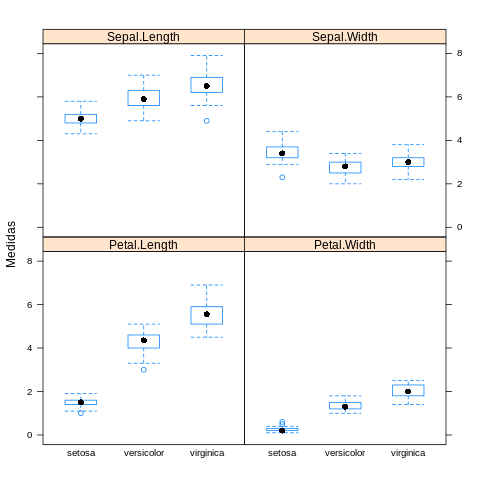

In [21]:
%%R
bwplot(Medidas ~ Species | Dimensoes, data = iris_modif)
#boxplot com a interação de duas variáveis que então vão interagir com outra variável
#o resultado da relação de Medidas e Species relacionando com Dimensoes
#ultimo parâmetro é a modificação do iris com reshape

##Irix **X** Reshape(iris) II

In [23]:
%%R
iris_modif_sp <- reshape(iris, #recebe conjunto iris como parâmetro
                         varying = list(c(1,3),c(2,4)),#variação com quais colunas fazer a transformação
                         v.names = c("Comprimento", "Largura"),#nomes dados às novas colunas
                         timevar = "Parte", 
                         times = c("Sepal", "Petal"),
                         idvar = "ID", 
                         direction = "long")

head(iris_modif_sp)#iris reshape2

        Species Parte Comprimento Largura ID
1.Sepal  setosa Sepal         5.1     3.5  1
2.Sepal  setosa Sepal         4.9     3.0  2
3.Sepal  setosa Sepal         4.7     3.2  3
4.Sepal  setosa Sepal         4.6     3.1  4
5.Sepal  setosa Sepal         5.0     3.6  5
6.Sepal  setosa Sepal         5.4     3.9  6


In [30]:
%%R
head(iris)#iris original

  Sepal.Length Sepal.Width Petal.Length Petal.Width Species
1          5.1         3.5          1.4         0.2  setosa
2          4.9         3.0          1.4         0.2  setosa
3          4.7         3.2          1.3         0.2  setosa
4          4.6         3.1          1.5         0.2  setosa
5          5.0         3.6          1.4         0.2  setosa
6          5.4         3.9          1.7         0.4  setosa


#### Deixamos apenas Sepal como Index. Esticamos verticalmente um pouco o comprimento do dataset deixando apenas como dados Species, Parte, Comprimento Largura e ID

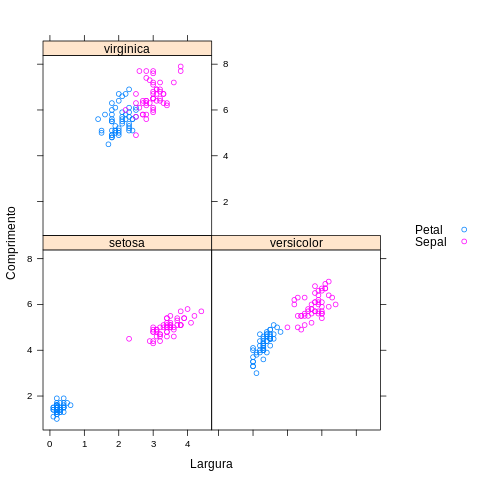

In [32]:
%%R 
xyplot(Comprimento ~  Largura | Species, #relação do resultado de duas variáves com Species
       groups = Parte, 
       data = iris_modif_sp, #ultimo dataset ajustado
       auto.key = list(space="right"))
#xyplot de dispersão do pacote lattice

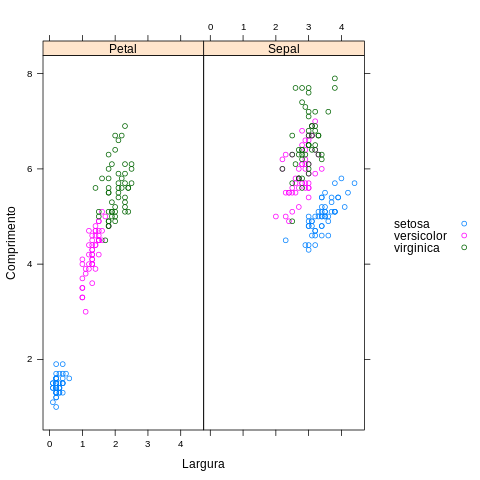

In [34]:
%%R
xyplot(Comprimento ~  Largura | Parte, #relacionamento apenas entre duas variáveis
       groups = Species, 
       data = iris_modif_sp,
       auto.key = list(space="right"))

---

#**Pacote Reshape()**  - {"reshape2"}
##Remodelagem de dados

In [0]:
# Reshape2
%%R
install.packages("reshape2")
library(reshape2)

## Criando novo DataFrame aleatório

In [37]:
%%R
# Criando um dataframe
df = data.frame(nome = c("Zico", "Pele"), 
               chuteira = c(40, 42),
               idade = c(34,NA),
               peso = c(93, NA),
               altura = c(175, 178))
df

  nome chuteira idade peso altura
1 Zico       40    34   93    175
2 Pele       42    NA   NA    178


#### Duas pessoas e seus atributos.


---

#**melt()** - linhas em colunas {reshape}

### Derretendo DataFrame

In [40]:
%%R
# "Derretendo" o dataframe - Função melt() 
df_wide = melt(df, id = c("nome", "chuteira"))
df_wide



  nome chuteira variable value
1 Zico       40    idade    34
2 Pele       42    idade    NA
3 Zico       40     peso    93
4 Pele       42     peso    NA
5 Zico       40   altura   175
6 Pele       42   altura   178


## Com melt() acima temos agora **atributos como variáveis**. 



In [42]:
%%R
df

  nome chuteira idade peso altura
1 Zico       40    34   93    175
2 Pele       42    NA   NA    178


## Com este DataFrame original não temos as variáveis distribuídas por colunas

---

#**na.rm = TRUE**

In [44]:
%%R
# Removendo NA
df_wide = melt(df, id = c("nome", "chuteira"), na.rm = TRUE) #opção para remover valores NA
df_wide
# Removendo NA nem sempre é a solução para datasets pequenos
# Interpolação de valores pode ser uma alternativa para manter valores (médios)

  nome chuteira variable value
1 Zico       40    idade    34
3 Zico       40     peso    93
5 Zico       40   altura   175
6 Pele       42   altura   178


#**dcast()** - colunas em linhas {reshape2}
### Assim como podemos derreter com melt(), também podemos esticá-lo com dcast()

In [47]:
%%R
# "Esticando" o dataframe
dcast(df_wide, formula = chuteira + nome ~ variable) #fórmula de chuteira + nome ao lado esquerdo e variable à direita


  chuteira nome idade peso altura
1       40 Zico    34   93    175
2       42 Pele    NA   NA    178


In [48]:
%%R
dcast(df_wide, formula = nome + chuteira  ~ variable) #fórmula de nome + chuteira ao lado esquerdo e variable à direita

  nome chuteira idade peso altura
1 Pele       42    NA   NA    178
2 Zico       40    34   93    175


In [49]:
%%R
dcast(df_wide, formula = nome  ~ variable) #nome à esquerda de todas às variáveis

  nome idade peso altura
1 Pele    NA   NA    178
2 Zico    34   93    175


In [50]:
%%R
dcast(df_wide, formula = ...  ~ variable)# indica todas as variáveis

  nome chuteira idade peso altura
1 Pele       42    NA   NA    178
2 Zico       40    34   93    175


---


#**Reshape2** - Airquality

In [0]:
%%R
names(airquality) <- tolower(names(airquality))


In [53]:
%%R
head(airquality)


  ozone solar.r wind temp month day
1    41     190  7.4   67     5   1
2    36     118  8.0   72     5   2
3    12     149 12.6   74     5   3
4    18     313 11.5   62     5   4
5    NA      NA 14.3   56     5   5
6    28      NA 14.9   66     5   6


In [54]:
%%R
dim(airquality)

[1] 153   6


## Aplicando melt() - linhas em colunas

In [56]:
%%R
# Função melt() - wide
#?melt
df_wide <- melt(airquality) 
# indica abaixo que não há variável ID, portanto usando demais variáveis como variávies

R[write to console]: No id variables; using all as measure variables



In [57]:
%%R
  class(df_wide)


[1] "data.frame"


In [59]:
%%R
  head(df_wide)

  variable value
1    ozone    41
2    ozone    36
3    ozone    12
4    ozone    18
5    ozone    NA
6    ozone    28


In [60]:
%%R
  tail(df_wide)

    variable value
913      day    25
914      day    26
915      day    27
916      day    28
917      day    29
918      day    30


---

#**Incluindo mais variáveis ao DataFrame**
### Passando vetor de variáveis como rótulo

In [61]:
%%R
# Inserindo mais duas variáveis
df_wide <- melt(airquality, id.vars = c("month", "day")) #vetor de variáveis
head(df_wide)



  month day variable value
1     5   1    ozone    41
2     5   2    ozone    36
3     5   3    ozone    12
4     5   4    ozone    18
5     5   5    ozone    NA
6     5   6    ozone    28


In [62]:
%%R 
#airquality original para comparação
head(airquality)

  ozone solar.r wind temp month day
1    41     190  7.4   67     5   1
2    36     118  8.0   72     5   2
3    12     149 12.6   74     5   3
4    18     313 11.5   62     5   4
5    NA      NA 14.3   56     5   5
6    28      NA 14.9   66     5   6


---

#**Principais diferenças entre melt() X dcast()**

In [63]:
%%R
df_wide <- melt(airquality, id.vars = c("month", "day"),
            variable.name = "climate_variable", 
            value.name = "climate_value")

head(df_wide)


  month day climate_variable climate_value
1     5   1            ozone            41
2     5   2            ozone            36
3     5   3            ozone            12
4     5   4            ozone            18
5     5   5            ozone            NA
6     5   6            ozone            28


In [65]:
%%R 
#melt()
df_wide <- melt(airquality, id.vars = c("month", "day"))
head(df_wide)

  month day variable value
1     5   1    ozone    41
2     5   2    ozone    36
3     5   3    ozone    12
4     5   4    ozone    18
5     5   5    ozone    NA
6     5   6    ozone    28


##Variáveis abaixo identificadas de maneira única

In [66]:
%%R 
#dcast()
# mais colunas, mais esticado de modo que tenhamos as variáveis totalmente identificadas
df_long <- dcast(df_wide, month + day ~ variable)
head(airquality)

  ozone solar.r wind temp month day
1    41     190  7.4   67     5   1
2    36     118  8.0   72     5   2
3    12     149 12.6   74     5   3
4    18     313 11.5   62     5   4
5    NA      NA 14.3   56     5   5
6    28      NA 14.9   66     5   6
